In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
version = 'v1'

# label load

In [3]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# Residual autoencoder

In [7]:
encoding_dim = 8

### input ###
input_label = keras.Input(shape=(one_hot_train_labels.shape[1],))

### encoder 1 residual ###
encoded_1 = layers.Dense(256, activation='relu')(input_label)
encoded_2 = layers.Dense(128, activation='relu')(encoded_1)

residual_1 = layers.Dense(128)(input_label)
encoded_3 = layers.add([encoded_2, residual_1])
dropout_1 = layers.Dropout(0.2)(encoded_3)

### encoder 2 residual ###
encoded_4 = layers.Dense(64, activation='relu')(dropout_1)
encoded_5 = layers.Dense(32, activation='relu')(encoded_4)

residual_2 = layers.Dense(32)(dropout_1)
encoded_6 = layers.add([encoded_5, residual_2])
dropout_2 = layers.Dropout(0.2)(encoded_6)

### encoder 3 dense ###
encoded_7 = layers.Dense(16, activation='relu')(dropout_2)


### latent space ###
latent_space = layers.Dense(encoding_dim, activation='relu')(encoded_7)


### decoder 1 dense ###
decoded_1 = layers.Dense(16, activation='relu')(latent_space)

### decoder 2 residual ###
decoded_2 = layers.Dense(32, activation='relu')(decoded_1)
decoded_3 = layers.Dense(64, activation='relu')(decoded_2)

residual_3 = layers.Dense(64)(decoded_1)
decoded_4 = layers.add([decoded_3, residual_3])

### decoder 3 residual ###
decoded_5 = layers.Dense(128, activation='relu')(decoded_4)
decoded_6 = layers.Dense(256, activation='relu')(decoded_5)

residual_4 = layers.Dense(256)(decoded_4)
decoded_7 = layers.add([decoded_6, residual_4])

### output ###
decoded_8 = layers.Dense(one_hot_train_labels.shape[1], activation='sigmoid')(decoded_7)



autoencoder = keras.Model(input_label, decoded_8)

autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

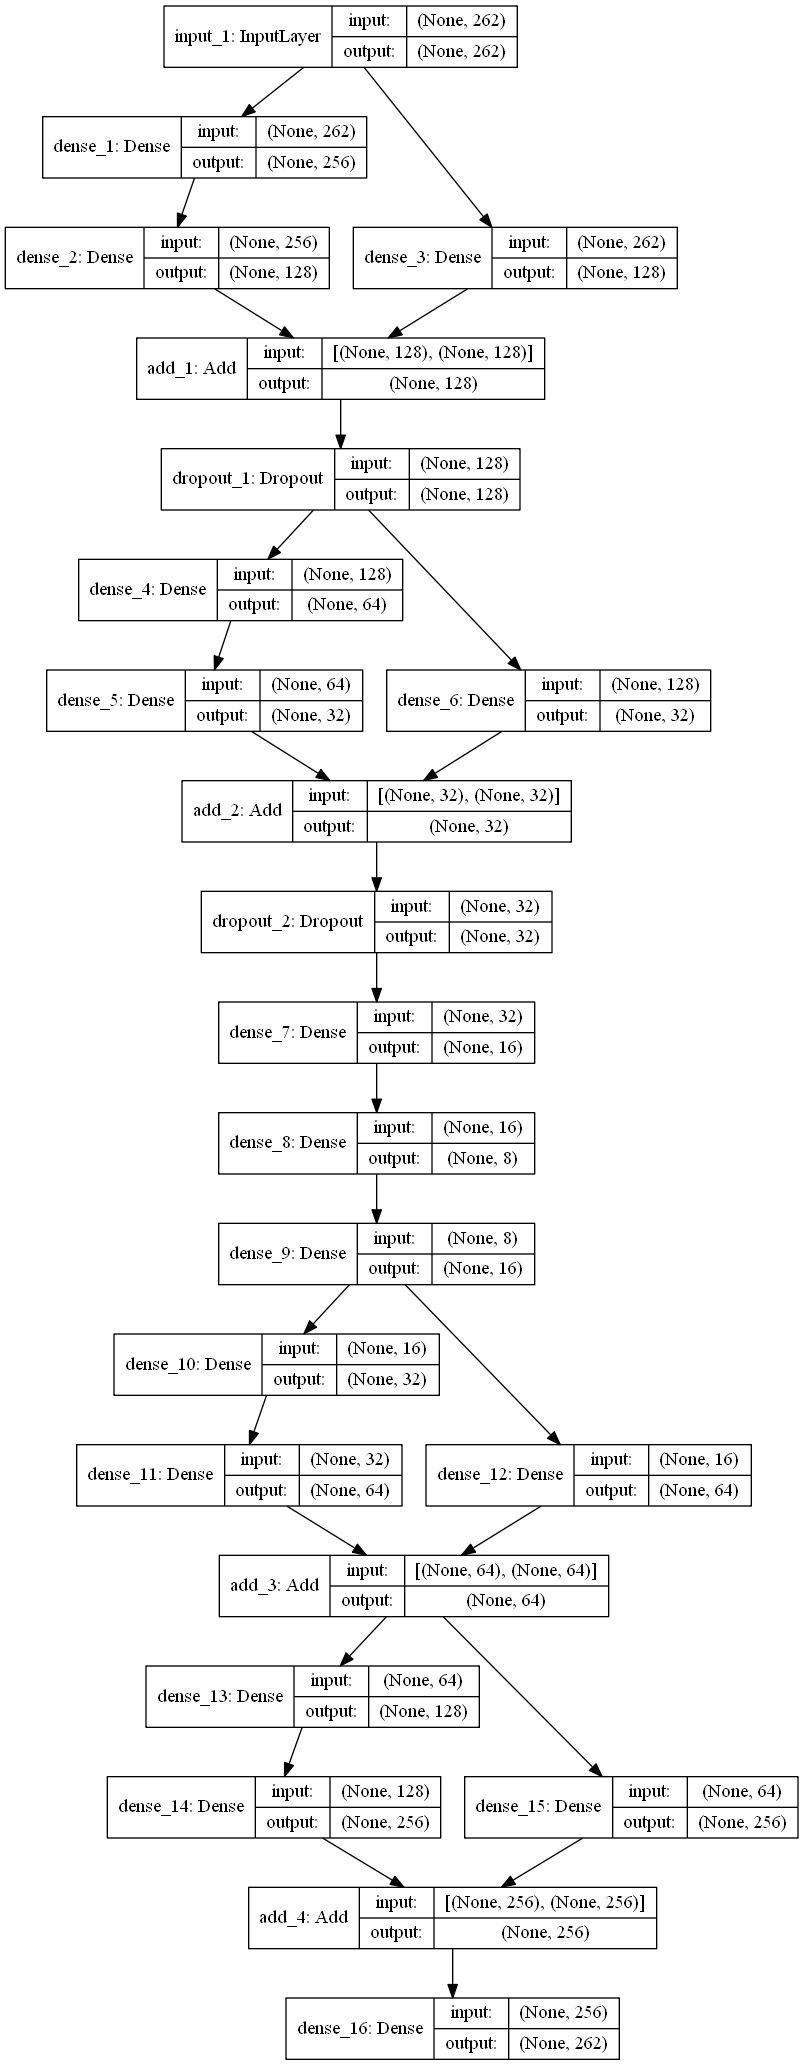

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Residual_AE_ls8_{}.png'.format(version))

In [9]:
encoder = keras.Model(input_label, latent_space)

encoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

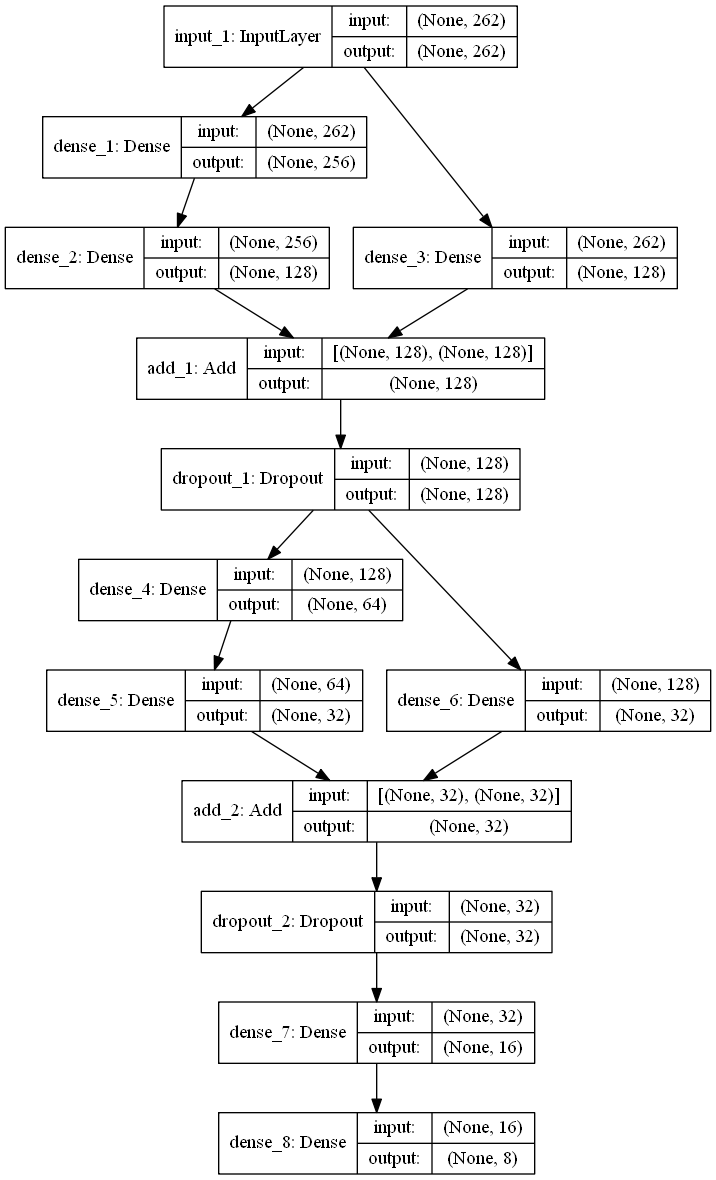

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(encoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(encoder, show_shapes=True, to_file='./img/Residual_Encoder_ls8_{}.png'.format(version))

In [11]:
### input ###
decoded_input = keras.Input(shape=(encoding_dim,))

### decoder 1 residual ###
decoder_layer1 = autoencoder.layers[-10](decoded_input)

### decoder 2 residual ###
decoder_layer4 = autoencoder.layers[-9](decoder_layer1)
decoder_layer5 = autoencoder.layers[-8](decoder_layer4)
decoder_residual2 = autoencoder.layers[-7](decoder_layer1)
decoder_layer6 = autoencoder.layers[-6]([decoder_layer5, decoder_residual2])

### decoder 3 residual ###
decoder_layer7 = autoencoder.layers[-5](decoder_layer6)
decoder_layer8 = autoencoder.layers[-4](decoder_layer7)
decoder_residual3 = autoencoder.layers[-3](decoder_layer6)
decoder_layer9 = autoencoder.layers[-2]([decoder_layer8, decoder_residual3])

### output ###
decoder_layer10 = autoencoder.layers[-1](decoder_layer9)


decoder = keras.Model(decoded_input, decoder_layer10)

decoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 8)            0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 16)           144         input_2[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 32)           544         dense_9[1][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 64)           2112        dense_10[1][0]                   
____________________________________________________________________________________________

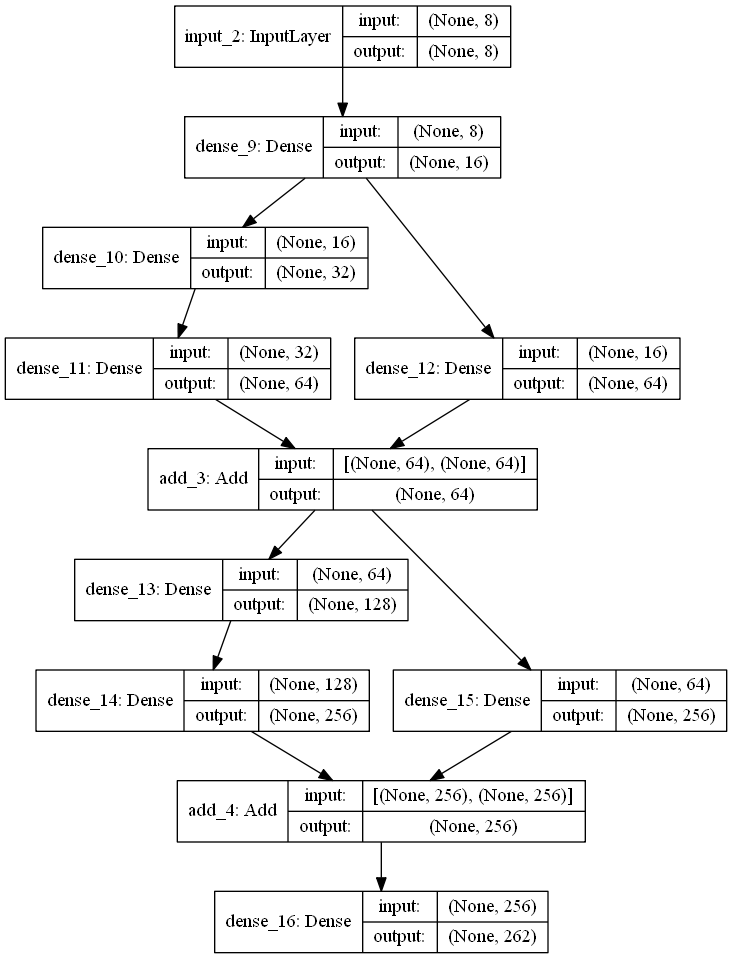

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(decoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(decoder, show_shapes=True, to_file='./img/Residual_Decoder_ls8_{}.png'.format(version))

In [13]:
optimizer = keras.optimizers.Adam(lr=0.001)

autoencoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
encoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
decoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)

### 버전 체크

In [14]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

filename = './trained_model/RAE_ls8_{}'.format(version) + '-{epoch:02d}-{val_loss:.5f}.h5'
mc = callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='auto')

In [15]:
history = autoencoder.fit(one_hot_train_labels,
                          one_hot_train_labels,
                          epochs=300,
                          batch_size=64,
                          validation_data=(one_hot_val_labels, one_hot_val_labels),
                          callbacks=[es, mc])

Train on 2805 samples, validate on 935 samples
Epoch 1/300
2805/2805 [==============================] - 1s 325us/step - loss: 0.2040 - val_loss: 0.0405

Epoch 00001: saving model to ./trained_model/RAE_ls8_v1-01-0.04047.h5
Epoch 2/300
2805/2805 [==============================] - 0s 101us/step - loss: 0.0391 - val_loss: 0.0366

Epoch 00002: saving model to ./trained_model/RAE_ls8_v1-02-0.03658.h5
Epoch 3/300
2805/2805 [==============================] - 0s 107us/step - loss: 0.0358 - val_loss: 0.0349

Epoch 00003: saving model to ./trained_model/RAE_ls8_v1-03-0.03490.h5
Epoch 4/300
2805/2805 [==============================] - 0s 102us/step - loss: 0.0341 - val_loss: 0.0325

Epoch 00004: saving model to ./trained_model/RAE_ls8_v1-04-0.03251.h5
Epoch 5/300
2805/2805 [==============================] - 0s 107us/step - loss: 0.0318 - val_loss: 0.0308

Epoch 00005: saving model to ./trained_model/RAE_ls8_v1-05-0.03076.h5
Epoch 6/300
2805/2805 [==============================] - 0s 101us/step - 

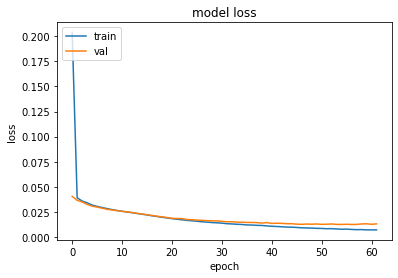

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
encoder.save('./trained_model/residual_encoder_ls8_{}.h5'.format(version))
decoder.save('./trained_model/residual_decoder_ls8_{}.h5'.format(version))

# inference

In [18]:
#one_hot_train_labels[0].shape[0]

In [19]:
encoded_values = encoder.predict(one_hot_test_labels)
encoded_values

array([[1.2815859 , 2.4420228 , 3.7308378 , ..., 3.650683  , 5.422423  ,
        4.1174645 ],
       [7.664857  , 3.560912  , 2.281829  , ..., 4.004691  , 3.9854114 ,
        3.9323962 ],
       [2.176334  , 1.2231145 , 1.4616878 , ..., 0.36999768, 0.84587383,
        2.4548516 ],
       ...,
       [1.7033721 , 1.0774786 , 1.4842596 , ..., 0.7069685 , 0.40364584,
        0.        ],
       [3.6067066 , 0.        , 2.454753  , ..., 3.355396  , 1.9359999 ,
        1.9690794 ],
       [5.8580823 , 2.169842  , 3.502044  , ..., 0.88398165, 5.1214833 ,
        4.3494773 ]], dtype=float32)

In [20]:
b = pd.DataFrame(encoded_values)
b.describe()

,0,1,2,3,4,5,6,7
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,3.329283,2.216253,2.599913,2.061649,2.804455,2.253250,2.424878,3.074053
std,2.069893,1.664685,1.809776,1.542256,2.167104,1.587591,1.781120,2.175935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.695052,0.982362,1.232137,0.818407,1.001348,0.937173,1.001662,1.380812
50%,3.226225,2.009001,2.356606,1.829754,2.628682,2.054878,2.121583,2.580566
75%,4.680254,2.951382,3.484828,2.905361,4.173102,3.500499,3.728020,4.324975
max,9.933820,7.112684,10.731979,7.195517,9.349573,7.719359,8.295091,9.238531


In [21]:
#b.to_excel('./Residual_AE_v10.xlsx')

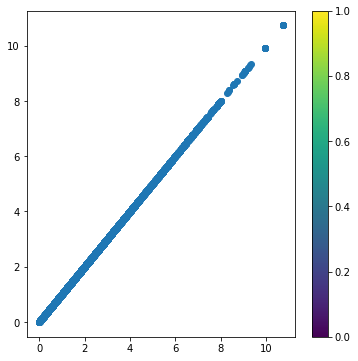

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_values[:, :], encoded_values[:, :])
plt.colorbar()
plt.show()

In [23]:
decoded_label = decoder.predict(encoded_values)
decoded_label

array([[1.26163033e-03, 2.91199349e-08, 9.99748886e-01, ...,
        7.46206777e-11, 4.23781232e-09, 1.48065628e-05],
       [2.21170437e-20, 3.30760258e-06, 1.41645568e-19, ...,
        5.79672842e-15, 6.03532087e-25, 3.49725847e-12],
       [4.76808926e-10, 2.95517268e-04, 3.89725111e-15, ...,
        5.40764850e-05, 6.70238604e-12, 1.00782654e-06],
       ...,
       [3.44747314e-05, 1.91765175e-05, 1.75011286e-04, ...,
        1.93453016e-04, 4.64797665e-07, 5.93556883e-03],
       [1.40727463e-09, 2.97192013e-08, 5.36815904e-04, ...,
        1.25306761e-13, 1.33775901e-09, 5.47887453e-07],
       [8.79327600e-17, 1.20309585e-08, 1.04707483e-17, ...,
        1.22624231e-08, 9.40202545e-22, 1.51519337e-14]], dtype=float32)

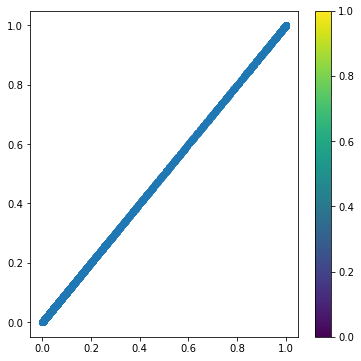

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(decoded_label[:, :], decoded_label[:, :])
plt.colorbar()
plt.show()

In [25]:
predicted_label = decoded_label.round()
predicted_label

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
"""predicted_label = np.where(decoded_label > 0.5, 1, 0)
predicted_label"""

'predicted_label = np.where(decoded_label > 0.5, 1, 0)\npredicted_label'

In [27]:
one_hot_test_labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [29]:
c_matrix.shape

(262, 2, 2)

In [30]:
c_matrix

array([[[932,   1],
        [  2,   0]],

       [[928,   0],
        [  7,   0]],

       [[867,   7],
        [  5,  56]],

       ...,

       [[932,   0],
        [  2,   1]],

       [[934,   0],
        [  0,   1]],

       [[934,   0],
        [  1,   0]]], dtype=int64)

In [ ]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='micro'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

In [ ]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='samples'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

In [36]:
"""labels = ["".join("c" + str(i)) for i in range(1, 21)]
labels"""

'labels = ["".join("c" + str(i)) for i in range(1, 21)]\nlabels'

In [37]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):\n\n    df_cm = pd.DataFrame(\n        confusion_matrix, index=class_names, columns=class_names,\n    )\n\n    try:\n        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)\n    except ValueError:\n        raise ValueError("Confusion matrix values must be integers.")\n    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha=\'right\', fontsize=fontsize)\n    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha=\'right\', fontsize=fontsize)\n    axes.set_xlabel(\'True label\')\n    axes.set_ylabel(\'Predicted label\')\n    axes.set_title("Confusion Matrix for the class - " + class_label)'

In [38]:
"""fig, ax = plt.subplots(5, 4, figsize=(12, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])
    
fig.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(5, 4, figsize=(12, 12))\n    \nfor axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):\n    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])\n    \nfig.tight_layout()\nplt.show()'